# Import Library dan Baca Data

In [1]:
# Import library pandas untuk manipulasi dan analisis data
import pandas as pd
# Import library numpy untuk operasi matematik
import numpy as np
# Import LinearRegression dari sklearn untuk membuat model regresi linear
from sklearn.linear_model import LinearRegression
# Import matplotlib.pyplot dan seaborn untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
#Mengecek Akurasi Data
from sklearn.metrics import r2_score

In [2]:
dataset = pd.read_csv('salary_dataset.csv')
dataset.head()

,no,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
dataset = dataset.drop('no',axis=1)
dataset.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


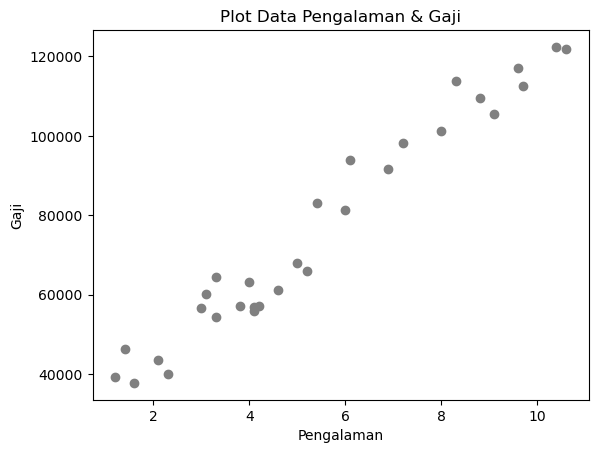

In [4]:
plt.scatter(dataset.YearsExperience, dataset.Salary, color='gray')
plt.xlabel('Pengalaman')
plt.ylabel('Gaji')
plt.title("Plot Data Pengalaman & Gaji")
plt.show()

In [5]:
dataset2 = pd.read_csv('data-penjualan.csv', delimiter=';')
dataset2.head()

,promosi,penjualan
0,25,100
1,27,105
2,29,108
3,30,109
4,35,120


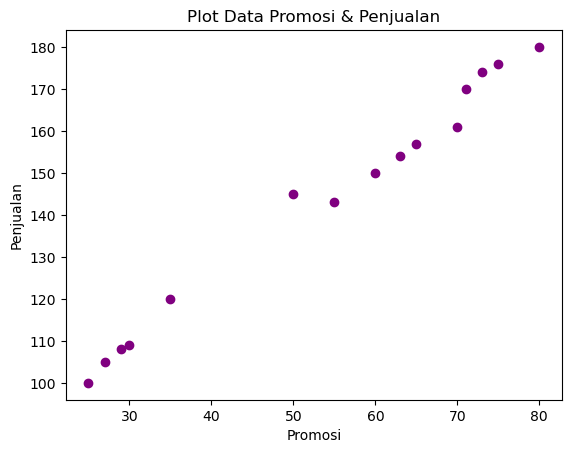

In [6]:
plt.scatter(dataset2.promosi, dataset2.penjualan, color='purple')
plt.xlabel('Promosi')
plt.ylabel('Penjualan')
plt.title("Plot Data Promosi & Penjualan")
plt.show()

# Korelasi

In [7]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [8]:
dataset2.corr()

,promosi,penjualan
promosi,1.00000,0.99369
penjualan,0.99369,1.00000


# Split Kolom

In [9]:
#Data Salary
pengalaman = dataset['YearsExperience'].values[:,np.newaxis]
gaji = dataset['Salary'].values

#Data Penjualan
promosi = dataset2['promosi'].values[:, np.newaxis]
penjualan = dataset2['penjualan'].values


# Modelling

In [10]:
model1 = LinearRegression()
model2 = LinearRegression()

model1.fit(pengalaman,gaji)
model2.fit(promosi, penjualan)

LinearRegression()

# Testing

In [15]:
pengalaman_test = [[1.1],[1],[7]]
predik_gaji = model1.predict(pengalaman_test)

promosi_test = [[20],[100]]
predik_penjualan = model2.predict(promosi_test)

print("Prediksi Gaji : ", predik_gaji)
print("Prediksi Penjualan", predik_promo)

Prediksi Gaji :  [35243.16252012 34298.16628798 90997.94021671]
Prediksi Penjualan [ 95.38781949 208.95989944]


# Akurasi

In [12]:
# Menghitung R-squared untuk model gaji
r2_gaji = r2_score(gaji, model1.predict(pengalaman))
print("R-squared Gaji:", r2_gaji)

# Menghitung R-squared untuk model penjualan
r2_penjualan = r2_score(penjualan, model2.predict(promosi))
print("R-squared Penjualan:", r2_penjualan)

#Nilai R-squared berkisar antara 0 dan 1, dan semakin mendekati 1, semakin baik modelnya. Nilai yang mendekati 0 menunjukkan bahwa model tidak dapat menjelaskan variasi data dengan baik.

R-squared Gaji: 0.9569566641435086
R-squared Penjualan: 0.9874197015184576


# Visualisasi Data

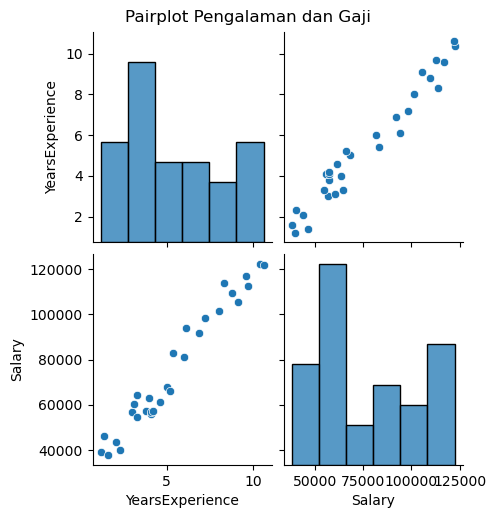

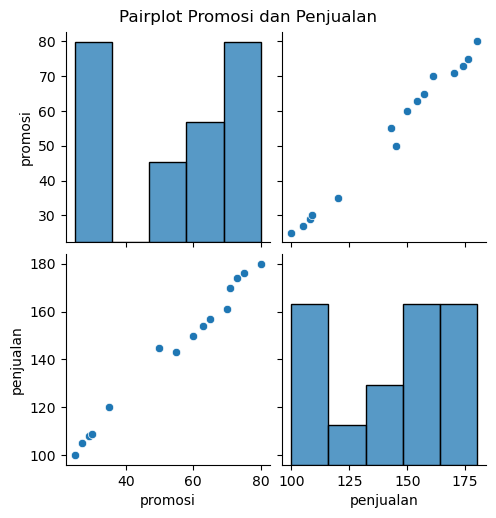

In [13]:
sns.pairplot(dataset)
plt.suptitle("Pairplot Pengalaman dan Gaji", y=1.02)
plt.show()

sns.pairplot(dataset2)
plt.suptitle("Pairplot Promosi dan Penjualan", y=1.02)
plt.show()


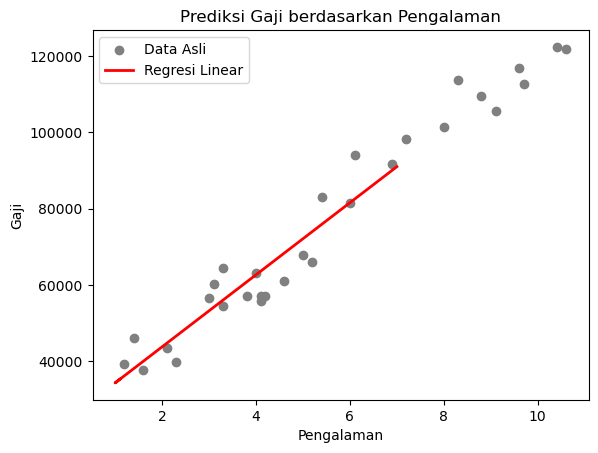

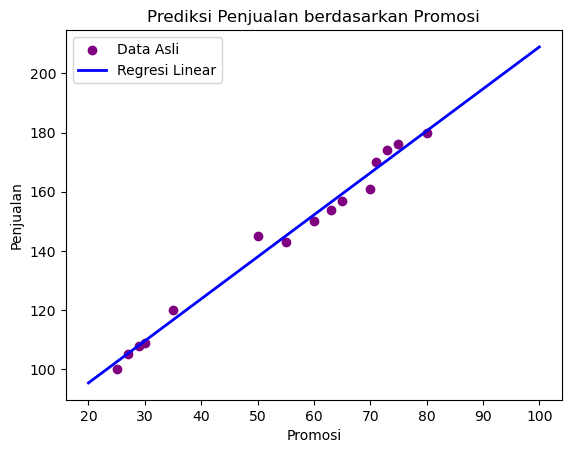

In [14]:
# Visualisasi Hasil Prediksi Pengalaman dan Gaji
plt.scatter(dataset.YearsExperience, dataset.Salary, color='gray', label='Data Asli')
plt.plot(pengalaman_test, predik_gaji, color='red', linewidth=2, label='Regresi Linear')
plt.xlabel('Pengalaman')
plt.ylabel('Gaji')
plt.title("Prediksi Gaji berdasarkan Pengalaman")
plt.legend()
plt.show()

# Visualisasi Hasil Prediksi Promosi dan Penjualan
plt.scatter(dataset2.promosi, dataset2.penjualan, color='purple', label='Data Asli')
plt.plot(promosi_test, predik_promo, color='blue', linewidth=2, label='Regresi Linear')
plt.xlabel('Promosi')
plt.ylabel('Penjualan')
plt.title("Prediksi Penjualan berdasarkan Promosi")
plt.legend()
plt.show()
